# Simple Regression

#### In this regression task (Task2) we will predict the percentage of marks that a student is expected to score depending on the number of hours they studied. This is a simple linear regression task. It involves only two variables

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [15]:
data = pd.read_excel("C:\\Users\\HP\\Desktop\\grip.xlsx")

In [16]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Text(0, 0.5, 'Percentage Score')

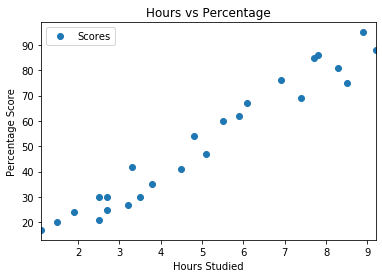

In [21]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  


In [12]:
import seaborn as sns
import matplotlib

##### We can use pairplot from matplotlib library to see the relationship between scores and number of hours. It can be inferred that there is a positive linear relationship between hours studied and percentage scored.

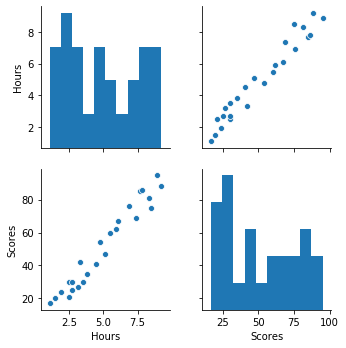

In [22]:
sns.pairplot(data)

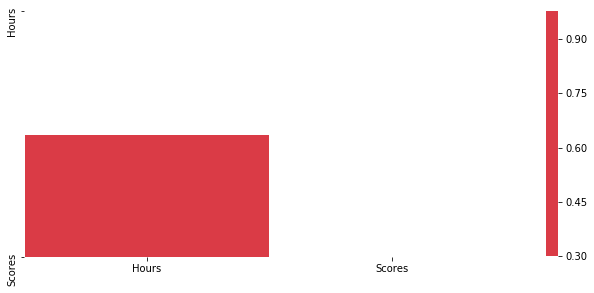

In [23]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Preparing the data

#### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [41]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

###### Training the Algorithm
###### We have split our data into training and testing sets and will train the algorithm

In [42]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [43]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


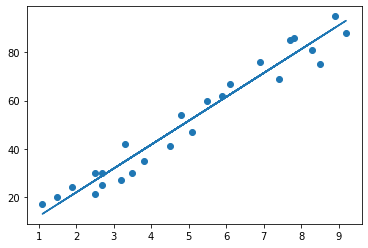

In [44]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

#### Now that we have trained our algorithm, it's time to make some predictions.

In [45]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [46]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [53]:
a= regressor.predict([[9.25]])
print("Predicted score, if a student studies for 9.25 hours in a day:", a)

Predicted score, if a student studies for 9.25 hours in a day: [93.69173249]


###### Evaluating the model
###### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. This can be done by checking the various metrics such as Mean_Squared_Error, Root_Mean_Squared_Error, Mean Absolute Error etc.

In [49]:
from sklearn import metrics  
mae = metrics.mean_absolute_error(y_test, y_pred)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [51]:
from math import sqrt
rmse = sqrt(mse)

In [52]:
print('Mean_Absolute_Error :' ,mae)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Absolute_Error : 4.183859899002975
Mean_Squared_Error : 21.5987693072174
Root_Mean_Squared_Error : 4.6474476121003665
r_square_value : 0.9454906892105356


##### The value of R square is 0.9454 then this suggests that 94.5% of the variation in Percentage Score(Y) can be explained with the help of the given explanatory variable which is Hours in the model. The independent variables explain the proportion of variation in the dependent variable.